<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Brief 9 -  </h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 3 - Clustering </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 3.1 - Importation des librairies</h3>
</div>

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram

In [2]:
data = pd.read_csv(r'../data/CURATED/df_final.csv', encoding="UTF8", sep=',')

In [12]:
df = data.copy()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Clustering Analyzis</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1 - Kmeans</h3>
</div>

In [13]:
df.drop(['local','Id'], axis= 1, inplace=True)

In [14]:
for col in ['valeur','surf_bati','surf terr', 'prix_m2','nbr_piece']:                               #, 'prix_m2','nbr_piece'
    df[col]=np.log10(df[col])
df.replace([np.inf, -np.inf], 0, inplace=True)

In [15]:
scaler = RobustScaler()
XX = scaler.fit_transform(df[['valeur','surf_bati','surf terr', 'prix_m2','nbr_piece']])
#XX=scaler.fit_transform(df)

In [16]:
YY=pd.DataFrame(XX, columns=[['valeur','surf_bati','surf terr', 'prix_m2','nbr_piece']])

In [17]:
YY

,valeur,surf_bati,surf terr,prix_m2,nbr_piece
0,0.107144,-0.556535,-0.784650,0.559685,-0.756471
1,-0.771699,-0.350742,-0.784650,-0.380618,-0.313964
2,-0.625257,-0.100980,-0.057203,-0.436379,-0.313964
3,-0.082729,1.054987,0.347901,-0.815474,0.610740
4,-0.940754,-0.632989,-0.784650,-0.320796,-0.756471
...,...,...,...,...,...
733389,-0.155650,-5.765934,0.068055,-1.305355,-1.512942
733390,-1.270972,-1.393766,-0.784650,-0.047289,-1.512942
733391,-1.328786,-1.835249,0.118772,0.231165,-1.512942
733392,0.803632,0.209184,0.152095,0.610221,0.243529


In [ ]:
wcss=[]
for i in range(1,11):
    kms = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kms.fit(XX)
    wcss.append(kms.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
silhouette_coefficients = []
  
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++' )
    kmeans.fit(XX)
    score = silhouette_score(XX, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
#plt.axvline(x=2, color='red', ls="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [18]:
clusters = [3,4,5,6]
cluster_centers = {}

for c in clusters:
    kms = KMeans(n_clusters=c, init='k-means++').fit(YY)
    YY['cluster' + str(c)] = kms.labels_
    cluster_centers[str(c)] = kms.cluster_centers_

TypeError: only integer scalar arrays can be converted to a scalar index

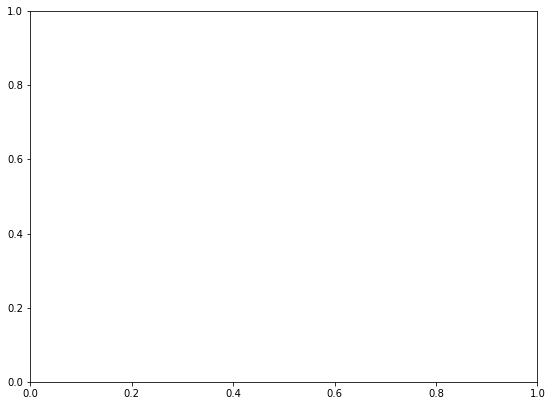

In [19]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(YY['valeur'],YY['surf_bati'], YY['cluster' + str(c)], s=50, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,0], cluster_centers[str(c)][:,1], color='black', s=100)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(YY['valeur'],YY['surf terr'], YY['cluster' + str(c)], s=50, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,0], cluster_centers[str(c)][:,2], color='black', s=100)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
for i, c in enumerate(clusters):
    plt.subplot(2,2,i+1)
    sns.scatterplot(YY['valeur'],YY['prix_m2'], YY['cluster' + str(c)], s=50, palette=sns.color_palette("hls", c))
    sns.scatterplot(cluster_centers[str(c)][:,0], cluster_centers[str(c)][:,3], color='black', s=100)
    plt.title('Number of clusters: ' + str(c))
    
plt.show()

In [ ]:
kmean = KMeans(n_clusters=7, n_init=10, init='k-means++')
yy_kmeans= kmean.fit_predict(XX)

In [ ]:
for i in range (1,5):
    fig = plt.figure(figsize=(14, 6))
    plt.scatter(XX[yy_kmeans == 0, 0], XX[yy_kmeans == 0, i], s = 4, c = 'red', label = 'Cluster 1')
    plt.scatter(XX[yy_kmeans == 1, 0], XX[yy_kmeans == 1, i], s = 4, c = 'blue', label = 'Cluster 2')
    plt.scatter(XX[yy_kmeans == 2, 0], XX[yy_kmeans == 2, i], s = 4, c = 'green', label = 'Cluster 3')
    plt.scatter(XX[yy_kmeans == 3, 0], XX[yy_kmeans == 3, i], s = 4, c = 'cyan', label = 'Cluster 4')
    plt.scatter(XX[yy_kmeans == 4, 0], XX[yy_kmeans == 4, i], s = 4, c = 'magenta', label = 'Cluster 5')
    plt.scatter(XX[yy_kmeans == 5, 0], XX[yy_kmeans == 5, i], s = 4, c = 'black', label = 'Cluster 6')
    plt.scatter(XX[yy_kmeans == 6, 0], XX[yy_kmeans == 6, i], s = 4, c = 'orange', label = 'Cluster 7')
    plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, i], s = 50, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of customers')
    plt.legend()
    plt.show()

In [ ]:
for i in range (0,3):
    fig = plt.figure(figsize=(14, 6))
    plt.scatter(XX[yy_kmeans == 0, 3], XX[yy_kmeans == 0, i], s = 4, c = 'red', label = 'Cluster 1')
    plt.scatter(XX[yy_kmeans == 1, 3], XX[yy_kmeans == 1, i], s = 4, c = 'blue', label = 'Cluster 2')
    plt.scatter(XX[yy_kmeans == 2, 3], XX[yy_kmeans == 2, i], s = 4, c = 'green', label = 'Cluster 3')
    plt.scatter(XX[yy_kmeans == 3, 3], XX[yy_kmeans == 3, i], s = 4, c = 'cyan', label = 'Cluster 4')
    plt.scatter(XX[yy_kmeans == 4, 3], XX[yy_kmeans == 4, i], s = 4, c = 'magenta', label = 'Cluster 5')
    plt.scatter(XX[yy_kmeans == 5, 3], XX[yy_kmeans == 5, i], s = 4, c = 'black', label = 'Cluster 6')
    plt.scatter(XX[yy_kmeans == 6, 3], XX[yy_kmeans == 6, i], s = 4, c = 'orange', label = 'Cluster 7')
    plt.scatter(kmean.cluster_centers_[:, 3], kmean.cluster_centers_[:, i], s = 50, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of customers')
    plt.legend()
    plt.show()

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(YY['Valeur fonciere'],
           YY['Surface reelle bati'],
           YY['Nombre pieces principales'],
           c=YY['cluster6'],
           s=15,  cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Valeur fonciere')
ax.set_ylabel('Surface reelle bati')
ax.set_zlabel('nb de piece')
ax.set_title('3D view of K-Means 6 clusters')
ax.dist = 12

plt.show()

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(YY['Prix m2'],
           YY['Surface reelle bati'],
           YY['Nombre pieces principales'],
           c=YY['cluster7'],
           s=15,  cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Prix m²')
ax.set_ylabel('Surface reelle bati')
ax.set_zlabel('nb de piece')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2 - PCA </h3>
</div>

In [ ]:
PCA = PCA(n_components=3)
PCA.fit(XX)
ACP = PCA.transform(XX)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2 - DBSCAN </h3>
</div>

In [ ]:
db = DBSCAN(eps=0.5, min_samples=10)

In [ ]:
pred=db.fit_predict(YY)

In [ ]:
YY['Labels_db'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(YY['Valeur fonciere'],YY['Surface reelle bati'], c=YY['Labels_db'], 
                cmap=plt.cm.Set1)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [ ]:
dbs = DBSCAN(eps=2.5, min_samples=16).fit(YY)

In [ ]:
YY['Labels_db'] = dbs.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(YY['Valeur fonciere'],YY['Surface reelle bati'], c=YY['Labels_db'], cmap=plt.cm.Set1,s=5)
plt.title('DBSCAN with epsilon 5, min samples 6')
plt.show()

In [ ]:
dbss = DBSCAN(eps=0.5, min_samples=26).fit(YY)

In [ ]:
YY['Labels_db'] = dbs.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(YY['Valeur fonciere'], YY['Surface reelle bati'], c=YY['Labels_db'], cmap=plt.cm.Set1, s=5)
plt.title('DBSCAN with epsilon 5, min samples 6')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3 - MeanShift </h3>
</div>

In [ ]:
bandwidth = estimate_bandwidth(YY, quantile=0.1)
ms = MeanShift(bandwidth).fit(YY)

In [ ]:
YY['Labels_M'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(YY['Valeur fonciere'],YY['Surface reelle bati'], hue=YY['Labels_M'], 
                c=YY['Labels_db'], cmap=plt.cm.Set1, s=5)
plt.plot()
plt.title('MeanShift')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4 - Hierarchical & AgglomerativeClustering </h3>
</div>

In [ ]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(YY)

In [ ]:
YY['Labels_Agg'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(YY['Valeur fonciere'],YY['Surface reelle bati'], hue=YY['Labels_Agg'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()